In [168]:
from os import listdir
from os.path import isfile, join
import glob
import re
import scipy
from scipy.signal import find_peaks
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
filelist = glob.glob('*.csv')
filelist

['1000bp.csv', '150bp.csv', '350bp.csv', '550bp.csv', 'control.csv']

In [75]:
df_dict = {}
for f in filelist:
    df = pd.read_csv(f, delimiter='\t')
    label = re.split('.csv', f)[0]
    df.dropna(axis=1, how='any', inplace=True)
    df.columns = ['time', 'intensity', 'id', 'RunProfileEntryIndex', 'RunNumber', 'row']
    df.drop(['id', 'RunProfileEntryIndex', 'RunNumber', 'row'], axis=1, inplace=True)
    df = df.set_index('time')
    df.columns=[label]
    df = df.squeeze()
    df_dict[label] = df

In [92]:
df = pd.DataFrame(df_dict)

In [115]:
df = df.loc[159.24:]

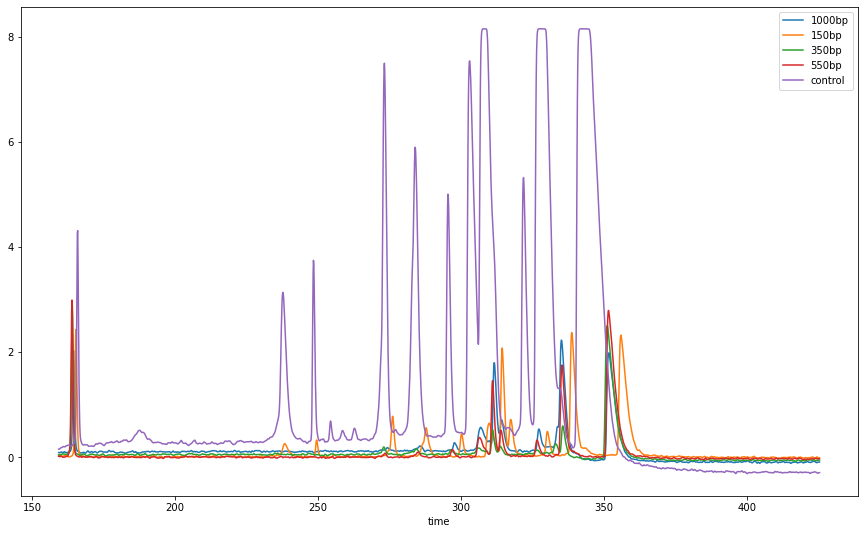

In [119]:
df.plot(figsize=(15,9))

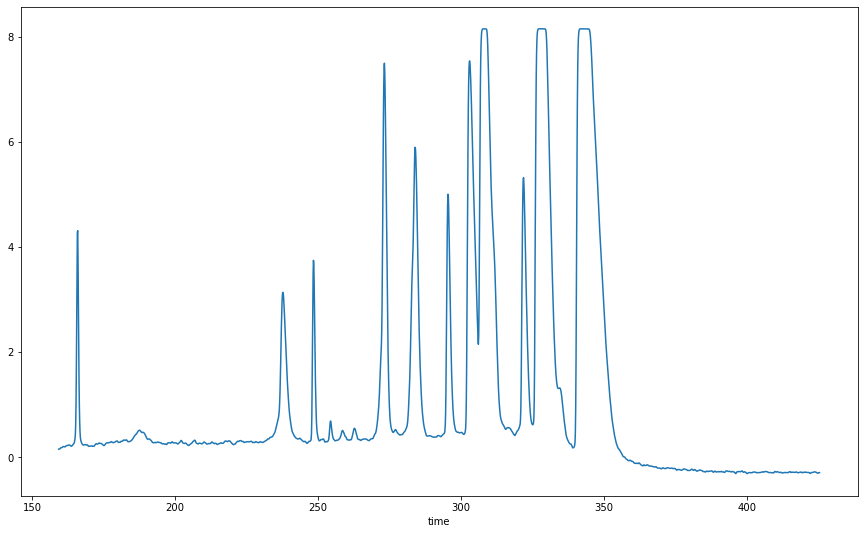

In [120]:
df['control'].plot(figsize=(15,9))

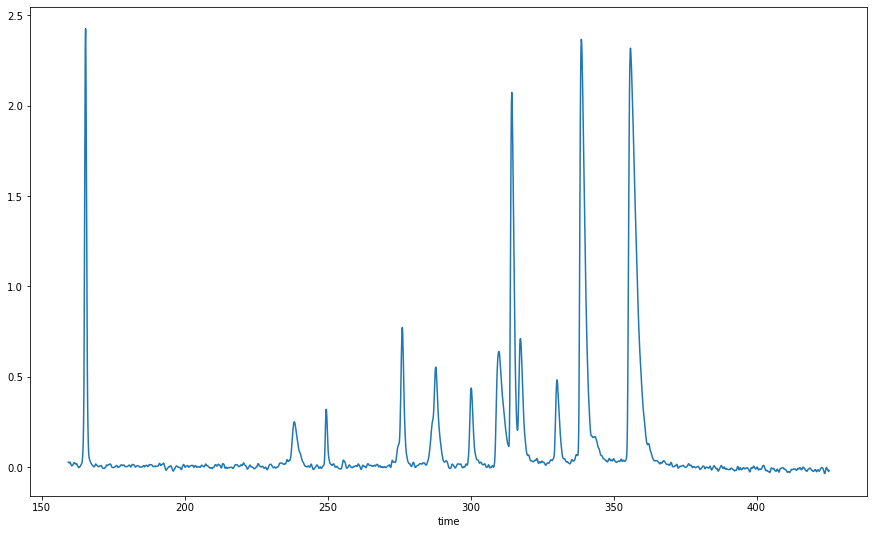

In [121]:
df['150bp'].plot(figsize=(15,9))

In [151]:
df.reset_index(inplace=True)

In [149]:
peaks, _ = find_peaks(df['150bp'], height=0.1)

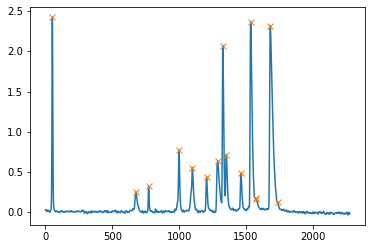

In [153]:
plt.plot(df['150bp'])
plt.plot(peaks, df['150bp'].loc[peaks], 'x')

In [165]:
df150 = df['150bp'].reset_index().drop('index', axis=1)

In [171]:
df150['size'] = np.nan

In [173]:
peaks

array([  52,  676,  771,  999, 1099, 1205, 1288, 1326, 1352, 1461, 1534,
       1571, 1575, 1681, 1736], dtype=int64)

In [175]:
df150.loc[52]['size'] = 15
df150.loc[1681]['size'] = 5000

In [183]:
df150.interpolate(inplace=True)

In [185]:
df150.dropna(inplace=True)

In [190]:
df150 = df150[df150['size'] > 15][df150['size'] < 5000]

C:\Users\sergi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


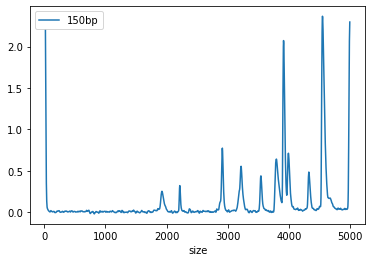

In [193]:
df150.set_index('size').plot()

In [154]:
df

,time,1000bp,150bp,350bp,550bp,control
0,159.24,0.0813,0.0284,0.0383,0.0097,0.1465
1,159.35,0.0789,0.0274,0.0397,0.0087,0.1475
2,159.47,0.0782,0.0248,0.0407,0.0065,0.1486
3,159.59,0.0789,0.0237,0.0398,0.0042,0.1504
4,159.71,0.0804,0.0257,0.0372,0.0042,0.1550
...,...,...,...,...,...,...
2271,424.94,-0.0971,-0.0161,-0.0622,-0.0376,-0.3074
2272,425.06,-0.0966,-0.0209,-0.0598,-0.0364,-0.3025
2273,425.18,-0.0973,-0.0236,-0.0585,-0.0365,-0.2999
2274,425.30,-0.0977,-0.0216,-0.0597,-0.0376,-0.3000
